# Single image quality

In this course, we are looking at the general meaning of "data quality". For a machine learning experiment, it makes sense to study the global quality of a whole dataset, and this can differ from the quality of single instances. However, for images, we believe it is important to understand and be able to gauge the quality of a single image in order to understand the bigger picture.

On this page, we will study, for a single image, different parameters of quality assessment, and see how a single image can be transformed to enhance its quality for a machine learning experiment.

## Contrast

First, let's have a look at the grayscale histogram. This histogram represents the distribution of gray values on a grayscale image. If the histogram contains more higher values, the image is mainly black, in the opposite case it is mainly white. So, a bright image will have a histogram located more to the right, while a picture containing a lot of shadows or dark areas will show a left-shifted histogram. A well-balanced image has values on the whole range of the histogram. A spike at one of the ends indicates the presence of pure black (left) or pure white (right).

A well-contrasted image allows a better recognition of the objects it contains. The grayscale histogram is a good indicator of contract: more values located to both ends of the graph indicates more "extreme" bright and dark values, so more contrast. On the contrary, a histogram showing a relatively constant slope on the whole range of values indicates a non-contrasted image.

A well-contrasted image should show better results in object detection and recognition, as it allows a better catch of the particular object that is studied.

First, we import an image and get its black and white version, with the function [rgb2gray()](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray) from the ``skimage`` library:

In [43]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

image = io.imread('./data/1.jpg')

image2 = rgb2gray(image)

The grayscale image is a simpler image and is stored only as an array of arrays, containing the lines of the image. No need for 3 channels as each pixel contains now only one value, the gray value.

In [41]:
image2

array([[0.23559176, 0.23951333, 0.24735647, ..., 0.08375961, 0.08375961,
        0.08375961],
       [0.23951333, 0.2434349 , 0.24735647, ..., 0.08768118, 0.08768118,
        0.08768118],
       [0.2434349 , 0.24735647, 0.25127804, ..., 0.09552431, 0.09552431,
        0.09552431],
       ...,
       [0.4076102 , 0.41153176, 0.41545333, ..., 0.66691686, 0.66664902,
        0.65488431],
       [0.39976706, 0.40368863, 0.40368863, ..., 0.66691686, 0.67057059,
        0.66693176],
       [0.40368863, 0.39976706, 0.39976706, ..., 0.66299529, 0.67449216,
        0.67869647]])

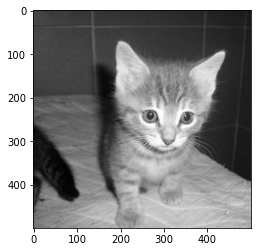

In [44]:
plt.imshow(image2, cmap = 'gray') # the parameter 'cmap' is necessary for the method to understand that we do not have
                                  # 3-color channels anymore but only 1 gray value for each pixel

Then we can plot the grayscale histogram with the method [hist()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) from the ``matplotlib`` library. We pass as a parameter the grayscale image, to which we add the method ``flatten()`` which transforms a list of lists into a simple list. Here, we do not need to keep the structure "in lines" of the image and can only take all the gray values to build a histogram.

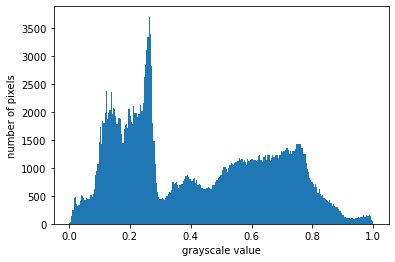

In [50]:
plt.figure()
plt.xlabel('grayscale value')
plt.ylabel('number of pixels')

plt.hist(image2.flatten(), bins = 256, range = (0, 1))
plt.show()

This histogram shows relatively well distributed gray values, but we can see a small part between 0.3 and 0.5 with less pixels, indicating a relatively contrasted image.

Have a look at the histograms for other images by changing the name of the picture ``1.jpg`` by any integer in the range ``[1, 20]``.

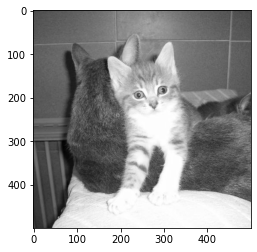

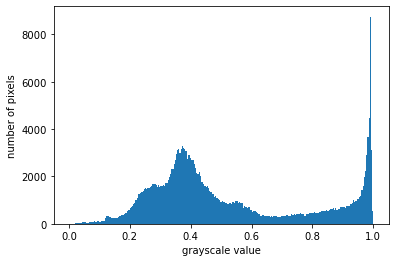

In [54]:
image = rgb2gray(io.imread('./data/2.jpg'))
plt.imshow(image, cmap = 'gray')
plt.figure()
plt.xlabel('grayscale value')
plt.ylabel('number of pixels')
plt.hist(image.flatten(), bins = 256, range = (0, 1))
plt.show()

In [55]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_hist(image_nb):
    image = rgb2gray(io.imread('./data/' + str(image_nb) + '.jpg'))
    plt.imshow(image, cmap = 'gray')
    plt.figure()
    plt.xlabel('grayscale value')
    plt.ylabel('number of pixels')
    plt.hist(image.flatten(), bins = 256, range = (0, 1))
    plt.show()

    
interact(plot_hist,
         image_nb = widgets.IntText(value = 1,
                                    description = 'Image:',
                                    disabled = False))

interactive(children=(IntText(value=1, description='Image:'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_hist(image_nb)>

## Color distribution

A method to gauge the quality of an image, depending on what we intend to do with it, can be to look at the distribution of the colors.

This is useful to  see if a pure color is present in the image, and for example is the point of the picture: a spike at the very end of the histogram for this color reveals that the color is present in its pure form on the image (a lot of pixels having a high value for this color).

It can also help to understand if the dataset is fit to a specific task. For example, in a task of traffic signs recognition, the distribution of the colors can be an important feature to look for, as it is likely to represent the class of the traffic sign (red for an interdiction, white for a danger or an obligation, etc...). Coupled with a shape analysis, one can build a model to recognize traffic signs.

In the same way as for the grayscale histogram, we can plot the histograms of the values of the different colors.

Each histogram is plotted using, for each pixel, only the value of the color we consider (``0`` for red, ``1`` for green and ``2`` for blue). Here, we plot the three colors on the same graph, so instead of a bar histogram we prefer to plot lines for readability. This is the purpose of the parameter ``histtype = 'step'`` in the function.

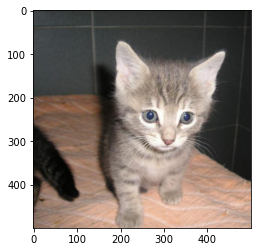

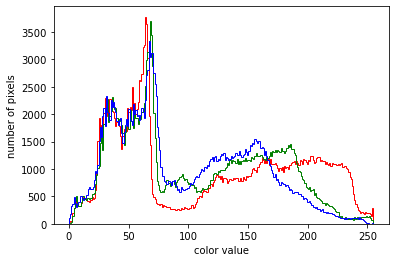

In [39]:
plt.imshow(image)

plt.figure()
plt.hist(image[:, :, 0].flatten(), bins = 256, color = 'r', histtype = 'step')
plt.hist(image[:, :, 1].flatten(), bins = 256, color = 'g', histtype = 'step')
plt.hist(image[:, :, 2].flatten(), bins = 256, color = 'b', histtype = 'step')
plt.xlabel('color value')
plt.ylabel('number of pixels')
plt.show()

For this image, we can see that the 3 colors are more or less blended together, meaning that the picture contains mainly grey and probably not one dominant color. The red curve goes a bit higher in the value range than the other colors: we see on the image a pink carpet.

To better understand what the histograms represent, have a look at other pictures. Change the name of the picture ``1.jpg`` by any integer in the range ``[1, 20]``.

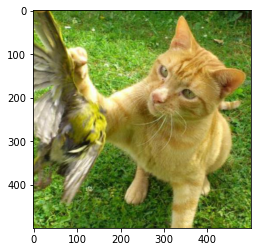

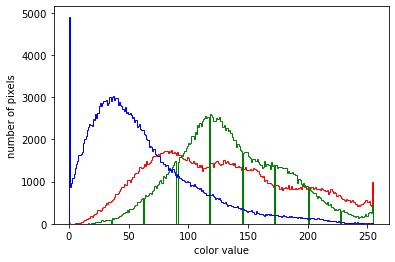

In [57]:
image = io.imread('./data/5.jpg')
plt.imshow(image)

plt.figure()
plt.hist(image[:, :, 0].flatten(), bins = 256, color = 'r', histtype = 'step')
plt.hist(image[:, :, 1].flatten(), bins = 256, color = 'g', histtype = 'step')
plt.hist(image[:, :, 2].flatten(), bins = 256, color = 'b', histtype = 'step')
plt.xlabel('color value')
plt.ylabel('number of pixels')
plt.show()

In [56]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def plot_hists(image_nb):
    image = io.imread('./data/' + str(image_nb) + '.jpg')
    plt.imshow(image)

    plt.figure()
    plt.hist(image[:, :, 0].flatten(), bins = 256, color = 'r', histtype = 'step')
    plt.hist(image[:, :, 1].flatten(), bins = 256, color = 'g', histtype = 'step')
    plt.hist(image[:, :, 2].flatten(), bins = 256, color = 'b', histtype = 'step')
    plt.xlabel('color value')
    plt.ylabel('number of pixels')
    plt.show()

    
interact(plot_hists,
         image_nb = widgets.IntText(value = 1,
                                    description = 'Image:',
                                    disabled = False))

interactive(children=(IntText(value=1, description='Image:'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_hists(image_nb)>

## Edge detection

